<a href="https://colab.research.google.com/github/slvDev/Digit-Recognizer-CNN-Keras/blob/master/Digit_Recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from random import randrange

In [13]:
df_train = pd.read_csv('/content/train.csv')
print(f'The train set contain {df_train.shape[0]} examples')
df_train.head(3)


The train set contain 42000 examples


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
test = pd.read_csv('/content/test.csv')
print(f'The test set contain {test.shape[0]} examples')
test.head(3)

The test set contain 28000 examples


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = df_train.drop('label', axis = 1)
y_train = df_train['label']

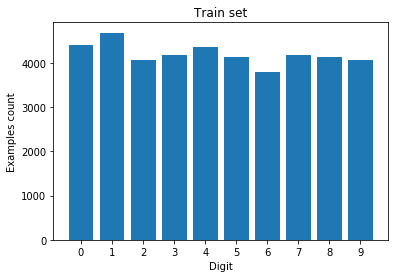

In [16]:
digits = y_train.unique()
values = y_train.value_counts()

plt.bar(digits, values)
plt.title('Train set')
plt.xlabel('Digit')
plt.ylabel('Examples count')
plt.xticks(np.arange(len(digits)))
plt.show()

In [0]:
#X_train = X_train / 255
#test = test / 255

In [0]:
X_train = normalize(X_train)
test = normalize(test)

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

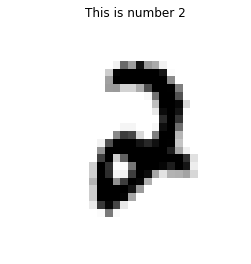

In [19]:
rnd_digit = randrange(X_train.shape[0])
img = X_train[rnd_digit][:,:,0]
label = y_train[rnd_digit]
plt.title(f'This is number {label}')
plt.axis('off')
plt.imshow(img, cmap=plt.cm.binary)

In [20]:
y_train = to_categorical(y_train)
y_train.shape

(42000, 10)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)

In [0]:
train_datagen = ImageDataGenerator(
        #rescale=1./255,
        rotation_range=20,
        zoom_range = 0.2, 
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        )

#val_datagen = ImageDataGenerator()

In [0]:
train_datagen.fit(X_train)
#val_datagen.fit(X_val)
#test_datagen.fit(X_test)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
        
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

W0616 17:43:55.999866 139980669220736 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.summary()

In [25]:

batch_size = 32
history = model.fit_generator(
        train_datagen.flow(X_train, y_train, batch_size=batch_size),
        epochs=50,
        validation_data=(X_val, y_val),
        )

Epoch 1/50
1050/1050 [==============================] - 21s 20ms/step - loss: 0.9670 - acc: 0.7006 - val_loss: 0.1247 - val_acc: 0.9626
Epoch 2/50
1050/1050 [==============================] - 16s 15ms/step - loss: 0.3476 - acc: 0.8927 - val_loss: 0.2337 - val_acc: 0.9307
Epoch 3/50
1050/1050 [==============================] - 16s 15ms/step - loss: 0.2576 - acc: 0.9207 - val_loss: 0.3822 - val_acc: 0.8945
Epoch 4/50
1050/1050 [==============================] - 16s 15ms/step - loss: 0.2194 - acc: 0.9314 - val_loss: 0.1909 - val_acc: 0.9374
Epoch 5/50
1050/1050 [==============================] - 16s 15ms/step - loss: 0.1878 - acc: 0.9439 - val_loss: 0.0460 - val_acc: 0.9869
Epoch 6/50
1050/1050 [==============================] - 16s 15ms/step - loss: 0.1699 - acc: 0.9492 - val_loss: 0.0388 - val_acc: 0.9888
Epoch 7/50
1050/1050 [==============================] - 15s 15ms/step - loss: 0.1672 - acc: 0.9490 - val_loss: 0.0360 - val_acc: 0.9883
Epoch 8/50
1050/1050 [==========================

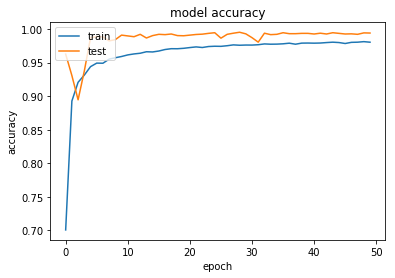

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

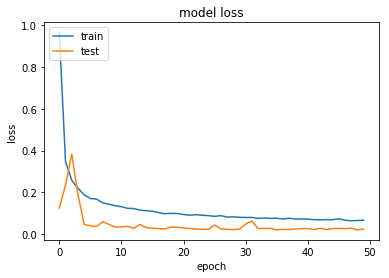

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
model.evaluate(X_test, y_test)

4200/4200 [==============================] - 0s 97us/sample - loss: 0.0144 - acc: 0.9950


[0.014387688878785065, 0.995]

In [29]:
#y_pred = model.predict_generator(test_datagen.flow(X_test, y_test, batch_size=batch_size))
#X_test = normalize(X_test, axis = 0)
y_pred = model.predict(X_test)
y_pred_cl = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

confusion_matrix(y_true, y_pred_cl)


array([[381,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 463,   0,   0,   0,   0,   0,   1,   0,   0],
       [  1,   0, 396,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 462,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0, 414,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0, 388,   2,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 413,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0, 458,   0,   2],
       [  0,   0,   0,   0,   0,   0,   1,   0, 401,   0],
       [  0,   0,   0,   0,   2,   0,   0,   1,   2, 403]])